###todo: add more variables from public data : time?
###change settings on SVR

### Sky cover, relative humidity, precipitation, temperature, dew point, wind speed

Short term weather forecasts for next day as well as for next three days

 Photovoltaic, meteorological and radiative measurements at SIRTA
 ####Col 7: Measured solar irradiance on the plane of the panels (27.7�)(zone 1)
 ####Col 12: 2-m Air temperature (zone 1)
 ####Col 14: 10-m Wind speed (zone 1)
 
Tuning hyper-parameters for R^2 Score (time irr)
Best parameters set found on development set:
{'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
Detailed report:
0.178399326674

### Tuning hyper-parameters for R2 Score (irr p1)
Best parameters set found on development set:
{'C': 10, 'kernel': 'rbf', 'gamma': 1}
R2 Score:
0.965792921757

In [1]:
# IMPORT MODULES

%matplotlib inline

import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import calendar

import sklearn.preprocessing as pp
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rms
from sklearn.metrics import mean_absolute_error as mae

import pandas as pd

In [2]:
# READ DATA
data = pd.read_csv("DonneesMeteo.txt", sep=" ", header=1)
data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")

dd = pd.DatetimeIndex(pd.to_datetime(data["Date"], format="%Y%m%d"))
data['DAY'] = dd.day
data['MONTH'] = dd.month
data['YEAR'] = dd.year

hh = pd.DatetimeIndex(pd.to_datetime(data['hh(UTC)']*3600*1000000000))
data['HOUR'] = hh.hour
data['MINUTE'] = hh.minute
data

,Date,hh(UTC),P1(W),Tp1(C),P2(W),Tp2(C),IrrPOA(W/m2),Gz2(W/m2),Drz2(W/m2),Dfz2(W/m2),...,mpT(C),mpWS(m/s),mpWD(deg),SZA(deg),SAA(deg),DAY,MONTH,YEAR,HOUR,MINUTE
0,2015-03-01,6.0167,0.0,7.7,0.0,8.7,0.0,-1.4,-0.3,-1.3,...,9.2,1.5,137.0,90.0,-85.3,1,3,2015,6,1
1,2015-03-01,6.0333,0.0,7.7,-0.0,8.6,0.0,-1.4,-0.3,-1.3,...,9.2,1.2,126.1,90.0,-85.1,1,3,2015,6,1
2,2015-03-01,6.0500,0.0,7.6,-0.0,8.6,0.0,-1.4,-0.3,-1.3,...,9.1,1.2,128.5,90.0,-84.9,1,3,2015,6,3
3,2015-03-01,6.0667,0.0,7.5,-0.0,8.5,0.0,-1.4,-0.3,-1.3,...,9.0,1.1,133.2,90.0,-84.7,1,3,2015,6,4
4,2015-03-01,6.0833,0.0,7.5,0.0,8.4,0.0,-1.4,-0.3,-1.3,...,9.0,1.3,128.1,90.0,-84.6,1,3,2015,6,4
5,2015-03-01,6.1000,0.0,7.4,0.0,8.4,0.0,-1.4,-0.3,-1.3,...,9.0,1.5,135.8,90.0,-84.4,1,3,2015,6,6
6,2015-03-01,6.1167,0.0,7.4,-0.0,8.4,0.0,-1.4,-0.3,-1.2,...,9.0,1.3,135.5,90.0,-84.2,1,3,2015,6,7
7,2015-03-01,6.1333,0.0,7.4,0.0,8.4,0.0,-1.4,-0.3,-1.3,...,9.0,1.7,127.4,90.0,-84.0,1,3,2015,6,7
8,2015-03-01,6.1500,0.0,7.4,-0.0,8.4,0.1,-1.4,-0.3,-1.2,...,9.0,1.3,124.5,90.0,-83.8,1,3,2015,6,9
9,2015-03-01,6.1667,0.0,7.4,0.0,8.4,0.1,-1.3,-0.3,-1.2,...,9.0,1.2,127.0,90.0,-83.6,1,3,2015,6,10


In [3]:
dataset = np.array(data[["IrrPOA(W/m2)", "P1(W)"]]).astype(np.float)

#Remove nan and infinite values
masknan = ~np.any(np.isnan(dataset), axis=1)
dataset = dataset[masknan]
maskfin = np.any(np.isfinite(dataset), axis=1)
dataset = dataset[maskfin]
X=dataset[:,0:1]
y=dataset[:,1]

#SCALE INDEPENDENT DATA
scaler = pp.StandardScaler()
X[:,0]=scaler.fit_transform(X[:,0])

#LABEL BINARIZER
lbmonth = pp.LabelBinarizer()
lbmonth.fit(list(range(12)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbmonth.classes_
Month=lbmonth.transform(data["MONTH"])

lbday = pp.LabelBinarizer()
lbday.fit(list(range(31)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbday.classes_
Day=lbday.transform(data["DAY"])

lbhour = pp.LabelBinarizer()
lbhour.fit(list(range(24)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbhour.classes_
Hour=lbhour.transform(data["HOUR"])

lbmin = pp.LabelBinarizer()
lbmin.fit(list(range(60)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbmin.classes_
Minute = lbmin.transform(data["MINUTE"])

Irr = np.reshape(X[:,0],(len(X),1))

X=np.concatenate((Irr,Month, Day, Hour,Minute),axis=1)

#X col 1 is irr, col 2-25 hours, col 26-86 min

In [4]:
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_training, X_CV, y_training, y_CV = train_test_split(X_full, y_full, test_size=0.5, random_state=0)

bestgamma = 0.2
bestC = 36

C = 20
C = 22
C = 24
C = 26
C = 28
C = 30
C = 32
C = 34
C = 36
C = 38


{'C': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38],
 'r2CCV': [0.968623021530298,
  0.96863042776812847,
  0.96863400007890443,
  0.96863508500608275,
  0.9686376426355211,
  0.96863914977471566,
  0.96864272204250013,
  0.9686443378130557,
  0.96864570275815598,
  0.968645668240811],
 'rmsCCV': [159.37707818185456,
  159.33945873590056,
  159.32131344334556,
  159.31580263471565,
  159.30281134215556,
  159.29515593832267,
  159.27701086413975,
  159.26880367521557,
  159.26187053593421,
  159.26204586427562]}

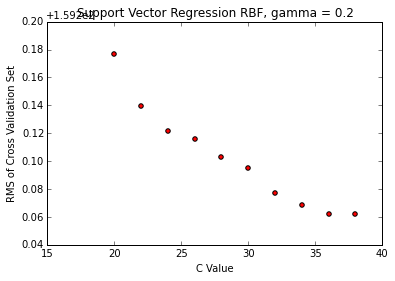

In [5]:
#RUNNING THROUGH VARIOUS PARAMETERS WITH CV SET
visualize= {}
visualize["C"]=[20,22,24,26,28,30,32,34,36,38]
visualize["r2CCV"] = []
visualize["rmsCCV"] = []

for Ci in visualize["C"]:
    print("C = "+str(Ci))
    clf = SVR(C=Ci, kernel='rbf', gamma= bestgamma);
    clf.fit(X_training, y_training)
    
    y_true, y_pred = y_CV, clf.predict(X_CV)
    visualize["r2CCV"].append(r2_score(y_true, y_pred))
    visualize["rmsCCV"].append(rms(y_true, y_pred))

plt.scatter(visualize["C"], visualize["rmsCCV"], c='r')
plt.xlabel('C Value')
plt.ylabel('RMS of Cross Validation Set')
plt.title('Support Vector Regression RBF, gamma = '+str(bestgamma))

visualize

Gamma = 0.1
Gamma = 0.12
Gamma = 0.14
Gamma = 0.16
Gamma = 0.18
Gamma = 0.2
Gamma = 0.22
Gamma = 0.24
Gamma = 0.26
Gamma = 0.28


{'Gamma': [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28],
 'r2GCV': [0.96973301933178202,
  0.969804565238926,
  0.96985995975370198,
  0.96990809977428982,
  0.96994209644000695,
  0.96996628674500029,
  0.96997051391058597,
  0.96995702664250061,
  0.96993927390242785,
  0.96991983470583421],
 'rmsGCV': [153.73892514683141,
  153.37551291937666,
  153.09414051378241,
  152.8496167833562,
  152.6769331944906,
  152.55406030110825,
  152.53258872121413,
  152.6010963177049,
  152.69127006866876,
  152.79001005277158]}

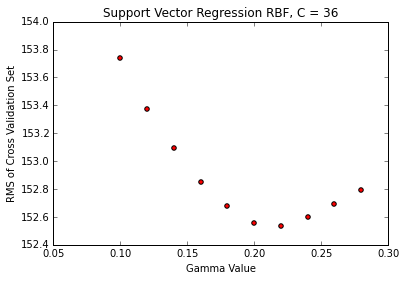

In [5]:
visualize2= {}
visualize2["Gamma"]=[0.1,0.12,0.14,0.16,0.18, 0.2, 0.22, 0.24, 0.26, 0.28]
visualize2["r2GCV"]=[]
visualize2["rmsGCV"]=[]

for Gammai in visualize2["Gamma"]:
    print("Gamma = "+str(Gammai))
    clf = SVR(C=bestC, kernel='rbf', gamma= Gammai);
    clf.fit(X_training, y_training)
    
    y_true, y_pred = y_CV, clf.predict(X_CV)
    visualize2["r2GCV"].append(r2_score(y_true, y_pred))
    visualize2["rmsGCV"].append(rms(y_true, y_pred))

plt.scatter(visualize2["Gamma"], visualize2["rmsGCV"], c='r')
plt.xlabel('Gamma Value')
plt.ylabel('RMS of Cross Validation Set')
plt.title('Support Vector Regression RBF, C = '+str(bestC))
visualize2

In [28]:
#CLF, C=80
clffinal = SVR(C=bestC, kernel='rbf', gamma= bestgamma);
clffinal.fit(X_training, y_training)

y_true, y_pred1 = y_test, clffinal.predict(X_test)

R2 Score, C=26, Gamma= 0.2:
0.963460197907
RMS, C=26, Gamma= 0.2:
184.926508093
sqrt of RMS, C=26, Gamma= 0.2:
13.5987686241


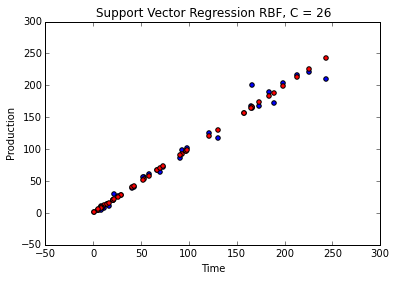

In [29]:
print("R2 Score, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(r2_score(y_true, y_pred1))
print("RMS, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(rms(y_true, y_pred1))
print("sqrt of RMS, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(np.sqrt(rms(y_true,y_pred1)));
print("MAE, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(mae(y_true, y_pred1))

X_graph = list(range(0,len(y_true)))
plt.scatter(y_true[0:40], y_pred1[0:40], c='b')
plt.scatter(y_true[0:40], y_true[0:40], c='r')
#plt.scatter(X_graph, y_pred1, c='b')
plt.xlabel('Time')
plt.ylabel('Production')
plt.title('Support Vector Regression RBF, C = '+str(bestC))

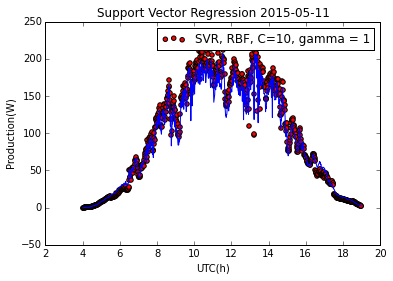

In [147]:
dateselect = "2015-05-11"

dayX = np.array(data[["IrrPOA(W/m2)", "P1(W)"]][data["Date"]==dateselect]).astype(np.float)

#Remove nan and infinite values
masknanX = ~np.any(np.isnan(dayX), axis=1)
dayX = dayX[masknanX]
maskfinX = np.any(np.isfinite(dayX), axis=1)
dayX = dayX[maskfinX]
dayX=dayX[:,0:1]
dayY=dayX[:,1]

#SCALE INDEPENDENT DATA
dayX[:,0]=scaler.fit_transform(dayX[:,0])

#LABEL BINARIZER
lbhour = pp.LabelBinarizer()
lbhour.fit(list(range(24)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbhour.classes_
HourX=lbhour.fit_transform(data["HOUR"][data["Date"]==dateselect])

lbmin = pp.LabelBinarizer()
lbmin.fit(list(range(60)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbmin.classes_
MinuteX = lbmin.fit_transform(data["MINUTE"][data["Date"]==dateselect])

IrrX = np.reshape(dayX[:,0],(len(dayX),1))

dayX=np.concatenate((IrrX,HourX,MinuteX),axis=1)

preddayY=clf.predict(dayX)

plt.scatter(daymarks, preddayY, c='r', label='SVR, RBF, C=10, gamma = 1')
plt.plot(daymarks,dayY)
plt.xlabel('UTC(h)')
plt.ylabel('Production(W)')
plt.title('Support Vector Regression '+dateselect)
plt.legend()
plt.savefig(dateselect+"SVR RBF")


with open('scores.txt','a') as f:
    f.write("\n")
    f.write(dateselect)
    f.write("\n")
    f.write("R2 Score:")
    f.write(str(r2_score(dayY,preddayY)))
    f.write("\n")
    f.write("Mean Squared Error:")
    f.write(str(rms(dayY,preddayY)))
    f.write("\n")
    f.close()